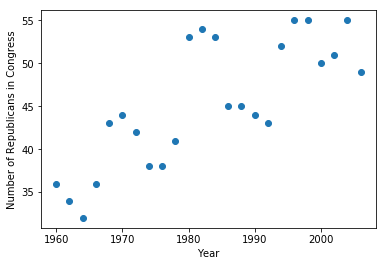

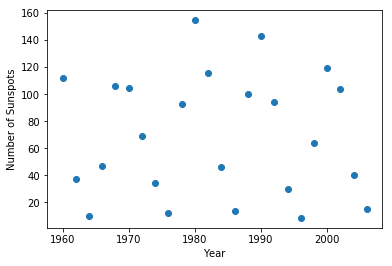

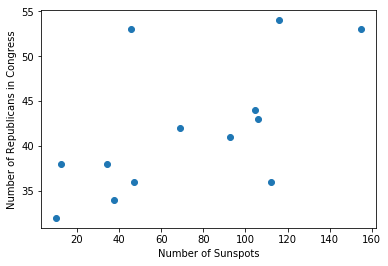

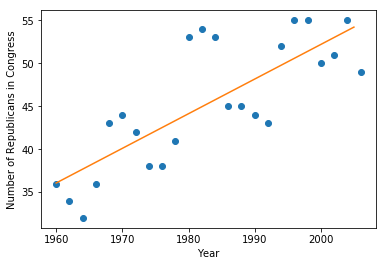

In [2]:
#####################
# CS 181, Spring 2016
# Homework 1, Problem 3
#
##################

import csv
import numpy as np
import matplotlib.pyplot as plt

csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(years.shape), years)).T

# TODO: basis functions


# Nothing fancy for outputs.
Y = republican_counts

# Find the regression weights using the Moore-Penrose pseudoinverse.
w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))

# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_years!!!!!
grid_years = np.linspace(1960, 2005, 200)
grid_X = np.vstack((np.ones(grid_years.shape), grid_years))
grid_Yhat  = np.dot(grid_X.T, w)

# TODO: plot and report sum of squared error for each basis

# Plot the data and the regression line.
plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.show()



# Problem 3a)

In [452]:
# 1) generate a poly

def gen_poly(X,K):
    
    if X.shape[0]!=1:
        X = X.reshape(1,-1)
    
    # generate arr K x shape 1 of x size
    Y = np.ones((K,X.shape[1]))*X

    # loop through rows and exponentiate them
    for i,j in enumerate(Y):
        Y[i]=np.power(Y[i],i)
        #print(i,Y[i])
        
    #create exponentiation coeffs in eye matrix form
    a_s = np.random.uniform(low=-1,high=1,size=K)
    #print(a_s)
    coeffs = np.eye(K)* a_s
    #coeffs.shape
    
    result = np.dot(coeffs,Y)
    
    # return the polynomial
    return np.sum(result,axis=0)
    

In [451]:
# 2) sample N points x_i

def sample_xi(N,low,high):
    if type(N)!=int:
        if N % np.floor(N)>0.5:
            N = np.ceil(N)
            N=np.int(N)
        else:
            N=np.floor(N)
            N=np.int(N)
    return np.random.uniform(low=low,high=high,size=N).reshape(1,-1)

In [453]:
#test
sample = sample_xi(3,-5,5)
print("Sample x_is: ",sample,"\n")
print("Sample polynomial: ",gen_poly(sample,K=10))


Sample x_is:  [[-2.73715875 -0.27229976  1.47333738]] 

Sample polynomial:  [  1.90310541e+03  -6.77264793e-01  -2.84404368e+01]


In [454]:
# 3) compute y_i = f(x_i) + err_i 

#returns both the true y_s as well as the variance of the true distribution
    
def get_ys_and_var(poly):

    f_min = min(poly)
    f_max = max(poly)

    err = np.random.normal(0,(f_max-f_min)/10,size=len(poly))

    y_is = poly + err
    
    var = (f_max-f_min)/10
    
    return y_is,var

In [455]:
N = 20
K=10

#get x_is
x_is = sample_xi(N,-5,5)
print("x_is: ",x_is,"\n\n")
#get poly with Ktrue =10
poly = gen_poly(x_is,10)
print("poly: ",poly,"\n\n")
y_s,var = get_ys_and_var(poly)

#print y_s and variance

print("Generated y_is :\n ",y_s)
print("\nConstant variance with K_true = 10 poly: ",var)

x_is:  [[ 4.81735071  4.42388081  1.56712723 -0.82604116  3.41352308  1.10135962
  -2.39950142  2.06654336  2.59484434 -1.77198997  1.22077324 -0.59790976
  -3.23100229 -1.69444244 -0.16758243  2.28011317  3.42039039  4.35151544
   0.94313232  3.94835576]] 


poly:  [ -1.08843852e+06  -5.20421601e+05  -9.89719197e+01   6.35380454e-01
  -5.62351366e+04  -8.09992451e+00   7.71266534e+02  -8.65629957e+02
  -5.58899365e+03   3.76710965e+01  -1.61504523e+01   4.07512842e-01
   1.37039218e+04   2.41443433e+01   1.82139830e-01  -1.92394436e+03
  -5.72056935e+04  -4.51308308e+05  -3.09939435e+00  -1.95317391e+05] 


Generated y_is :
  [-1305468.1844043   -479928.4791659    -91758.70106129     7054.50656652
   -75345.06570473  -326711.72426507   -44651.88171973  -114573.04193565
   -68110.45341555   149351.68077455    98925.29659569   114464.75147037
   -42516.01966335  -133384.15036352  -143535.79014328  -129866.40366048
    55910.82602489  -440743.64323326   137565.59502094  -214683.93010968]

# Problem 3b)

In [457]:
def minimize_chi2(K,y_s,x_is,var):
    
    # get coeffs
    coeffs = np.polyfit(y_s.reshape(-1,),x_is.reshape(-1,),K-1)
    #print(coeffs)
    
    ##### create sum of a^j x^j
    if x_is.shape[0]!=1:
        x_is = x_is.reshape(1,-1)
    
    # generate arr K x shape 1 of x size
    Y = np.ones((K,x_is.shape[1]))*x_is

    # loop through rows and exponentiate them
    for i,j in enumerate(Y):
        Y[i]=np.power(Y[i],i)
    
    #create exponentiation coeffs in eye matrix form
    #a_s = np.random.uniform(low=-1,high=1,size=K)
    #print(coeffs.shape)
    
    coeffs2 = np.eye(K)*coeffs
    #print(Y)
    #coeffs.shape
    
    result = np.dot(coeffs2,Y)
    #print(result.shape)
    ##########################
    sum_over_K = np.sum(result,axis=0)
    #print(y_s.shape,sum_over_K.shape)
    #print(np.power((y_s-sum_over_K),2))
    
    chi2 = (1/var)*np.sum(np.power((y_s-sum_over_K),2))
    
    #print(chi2)
    return chi2

In [458]:
minimize_chi2(3,y_s,x_is,var)

22138141.329775658

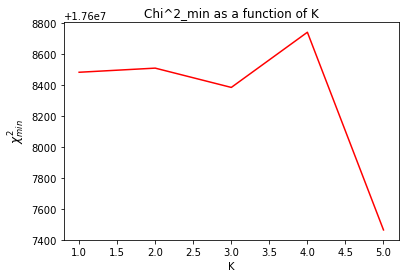

In [414]:
# Check that chi^2 is a decreasing function with respect to K

import matplotlib.pyplot as plt
%matplotlib inline
collect_Ks = [minimize_chi2(K,y_s,x_is,var) for K in range(1,6)]
plt.plot([i for i in range(1,6)],collect_Ks,color="red");
plt.xlabel("K")
plt.ylabel("$\chi^{2}_{{min}}$",{'fontsize' : 'large'});
plt.title("Chi^2_min as a function of K");

# Problem 3c)

In [435]:
N = 20
K=10
trials = 500

p_xi = 1/10

#get x_is
x_is = sample_xi(N,-5,5)

BIC = lambda K: (N/2)*np.log(2*np.pi*var)-N*np.log(1/10)+0.5*minimize_chi2(K,y_s,x_is,var)

optimal_Ks = np.zeros(trials)

for idx,trial in enumerate(range(trials)):

    #print("x_is: ",x_is,"\n\n")
    #get poly with Ktrue =10
    poly = gen_poly(x_is,K=10)
    #print("poly: ",poly,"\n\n")
    y_s,var = get_ys_and_var(poly)
    
    final_K = 1
    
    for i in range(2,10):
        if BIC(i)<BIC(final_K):
            final_K = i
    
    optimal_Ks[idx]=final_K
    
    #print(final_K)
#print(optimal_Ks)
print("Mean of optimal K for {} trials is: {}".format(trials,np.mean(optimal_Ks)))
print("Variance of optimal K for {} trials is: {:2f}".format(trials,np.var(optimal_Ks)))

Mean of optimal K for 500 trials is: 8.2
Variance of optimal K for 500 trials is: 1.048000


In [445]:
vals = 3*np.logspace(0,4,40)
int_vals = [int(val) for val in vals]
vals,int_vals

(array([  3.00000000e+00,   3.79914052e+00,   4.81115623e+00,
          6.09275286e+00,   7.71574143e+00,   9.77106197e+00,
          1.23738791e+01,   1.56700352e+01,   1.98442219e+01,
          2.51303292e+01,   3.18245507e+01,   4.03019800e+01,
          5.10376284e+01,   6.46330407e+01,   8.18500013e+01,
          1.03653219e+02,   1.31264381e+02,   1.66230610e+02,
          2.10511149e+02,   2.66587145e+02,   3.37600675e+02,
          4.27530801e+02,   5.41416530e+02,   6.85639159e+02,
          8.68279837e+02,   1.09957237e+03,   1.39247665e+03,
          1.76340482e+03,   2.23314090e+03,   2.82800537e+03,
          3.58132993e+03,   4.53532521e+03,   5.74344593e+03,
          7.27338605e+03,   9.21087189e+03,   1.16644655e+04,
          1.47716479e+04,   1.87065220e+04,   2.36895686e+04,
          3.00000000e+04]),
 [3,
  3,
  4,
  6,
  7,
  9,
  12,
  15,
  19,
  25,
  31,
  40,
  51,
  64,
  81,
  103,
  131,
  166,
  210,
  266,
  337,
  427,
  541,
  685,
  868,
  1099,
  13

# Problem 3d)

In [459]:
results_mean = {}
results_var = {}

for N in 3*np.logspace(0,4,40):
    K=10
    trials = 500

    p_xi = 1/10

    #get x_is
    x_is = sample_xi(N,-5,5)

    BIC = lambda K: (N/2)*np.log(2*np.pi*var)-N*np.log(1/10)+0.5*minimize_chi2(K,y_s,x_is,var)

    optimal_Ks = np.zeros(trials)

    for idx,trial in enumerate(range(trials)):

        #print("x_is: ",x_is,"\n\n")
        #get poly with Ktrue =10
        poly = gen_poly(x_is,K=10)
        #print("poly: ",poly,"\n\n")
        y_s,var = get_ys_and_var(poly)

        final_K = 1

        for i in range(2,10):
            if BIC(i)<BIC(final_K):
                final_K = i

        optimal_Ks[idx]=final_K

    print("Number of samples {} done.".format(N))
    results_mean[N] = np.mean(optimal_Ks)
    results_var[N] = np.var(optimal_Ks)

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

Number of samples 3.0 done.


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

Number of samples 3.7991405204022097 done.


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

Number of samples 4.811156231253991 done.


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

Number of samples 6.092752862714207 done.


/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removi

Number of samples 7.715741427178036 done.
Number of samples 9.77106196697935 done.
Number of samples 12.373879148704058 done.
Number of samples 15.670035222800525 done.
Number of samples 19.844221923690448 done.
Number of samples 25.130329202048753 done.
Number of samples 31.824550654183447 done.
Number of samples 40.301979977967 done.
Number of samples 51.03762839557768 done.
Number of samples 64.6330407009565 done.
Number of samples 81.85000129460305 done.
Number of samples 103.65321883776653 done.
Number of samples 131.26438125222555 done.
Number of samples 166.23060990028478 done.
Number of samples 210.51114860111477 done.
Number of samples 266.5871448823021 done.
Number of samples 337.6006747802294 done.
Number of samples 427.53080109089933 done.
Number of samples 541.4165300481511 done.
Number of samples 685.6391592404973 done.
Number of samples 868.2798374150256 done.
Number of samples 1099.5723711238877 done.
Number of samples 1392.4766500838332 done.
Number of samples 1763.404

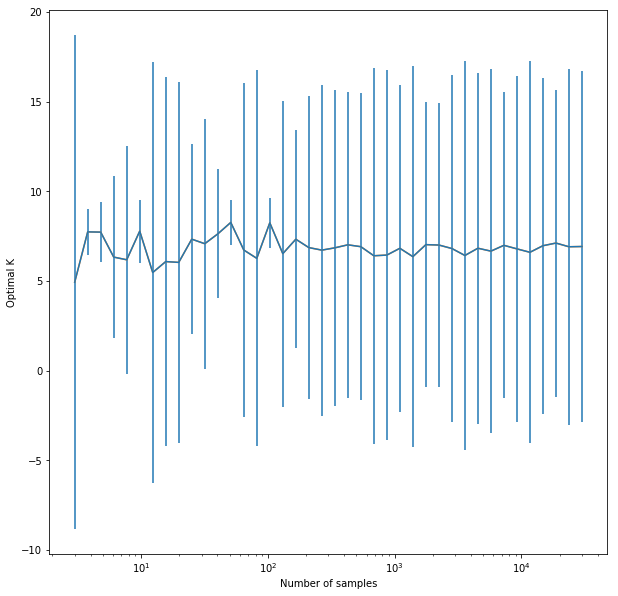

In [471]:
lists = sorted(results_mean.items()) # sorted by key, return a list of tuples
errors = sorted(results_var.items())

x, y = zip(*lists) # unpack a list of pairs into two tuples
x,y_errs = zip(*errors)

plt.figure(figsize=(10,10))
plt.errorbar(x,y,yerr=y_errs)
plt.semilogx(x, y)
plt.xlabel("Number of samples")
plt.ylabel("Optimal K")
plt.title("With Variance")
plt.show()

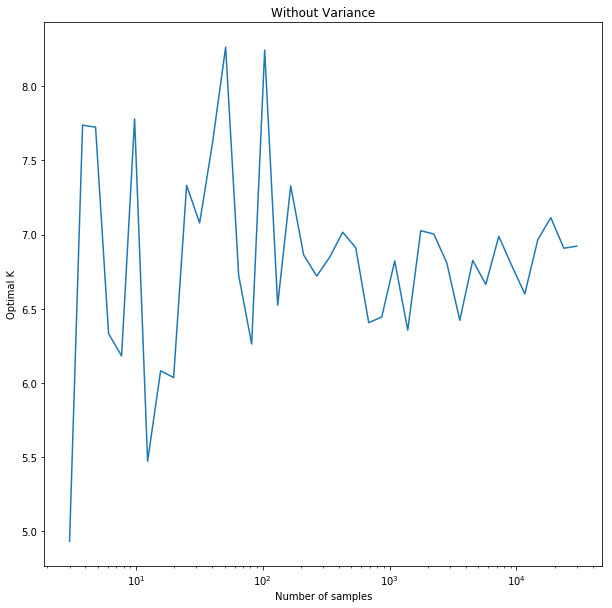

In [472]:
plt.figure(figsize=(10,10))
#plt.errorbar(x,y,yerr=y_errs)
plt.semilogx(x, y)
plt.xlabel("Number of samples")
plt.ylabel("Optimal K")
plt.title("Without Variance")
plt.show()